<a href="https://colab.research.google.com/github/yym10618/Colab/blob/master/Ch02.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/6_MNIST_%EC%88%AB%EC%9E%90_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2022/05/03
이름 : 양용민
내용 : MNIST 숫자 이미지 실습
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
df_mnist_train = pd.read_csv('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/mnist_train.csv', header=None)
df_mnist_test = pd.read_csv('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/mnist_test.csv', header=None)
df_mnist_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


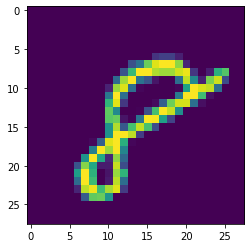

In [3]:
# 필셀 데이터를 이미지로 출력
img_list = df_mnist_train.iloc[59999, 1:].tolist()
img = np.reshape(img_list, [28, 28])
plt.imshow(img)

In [4]:
# 학습 데이터, 라벨
mnist_train_data = df_mnist_train.iloc[:, 1:] / 255
mnist_train_label = df_mnist_train.iloc[:, 0]

mnist_test_data = df_mnist_test.iloc[:, 1:] / 255
mnist_test_label = df_mnist_test.iloc[:, 0]

In [5]:
# 학습하기
model = svm.SVC()
model.fit(mnist_train_data, mnist_train_label)

SVC()

In [7]:
# 테스트하기
result = model.predict(mnist_test_data)

In [8]:
# 학습률
score = metrics.accuracy_score(result, mnist_test_label)
score

0.9792

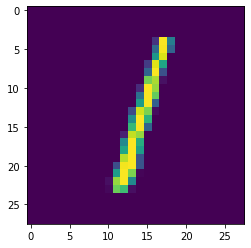

In [9]:
# 검증
row = 2

for i in range(10000):
  answer = model.predict(mnist_test_data.iloc[[row], :])
  answer[0]

img_list = mnist_test_data.iloc[row, :].tolist()
img = np.reshape(img_list, [28, 28])
plt.imshow(img)
plt.show()